In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Other Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,interest_in_discount_program,training_ID,trainer_name,training_total_meetings,training_price,discount_training,training_type,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,5,B0001,Ibun,17,4000000,50,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,5,B0002,Reza,17,11000000,50,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,5,B0003,Ibun,14,7000000,60,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,5,B0004,Reza,17,11000000,50,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,5,B0005,Haris,17,10000000,50,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...


In [3]:
df = df[["level_training_process", "satisfaction", "possibility_of_purchasing_the_same_training",
         "frequency_engagement", "group", "communication_channel", "complaints", "communication_quality",
         "tren_mode_factor", "training_name", "cross_selling"]]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   level_training_process                       5000 non-null   int64 
 1   satisfaction                                 5000 non-null   int64 
 2   possibility_of_purchasing_the_same_training  5000 non-null   int64 
 3   frequency_engagement                         5000 non-null   int64 
 4   group                                        5000 non-null   object
 5   communication_channel                        5000 non-null   object
 6   complaints                                   5000 non-null   object
 7   communication_quality                        5000 non-null   object
 8   tren_mode_factor                             5000 non-null   object
 9   training_name                                5000 non-null   object
 10  cross_sellin

In [4]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object" :
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])
             
scaler = MinMaxScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,level_training_process,satisfaction,possibility_of_purchasing_the_same_training,frequency_engagement,group,communication_channel,complaints,communication_quality,tren_mode_factor,training_name,cross_selling
0,1.0,1.0,0.943820,1.0,0,2,2,0,1,0,2
1,1.0,1.0,0.932584,1.0,0,2,2,0,1,0,2
2,1.0,1.0,0.943820,1.0,0,2,2,0,1,0,2
3,1.0,1.0,0.955056,1.0,0,2,2,0,1,0,2
4,1.0,1.0,0.988764,1.0,0,2,2,0,1,0,2


In [5]:
X = df2.drop("cross_selling", axis=1)
y = df2["cross_selling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 10), (1000, 10), (4000,), (1000,))

In [6]:
model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [7]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")

print(f"""
      Accuracy : {accuracy:.3f}
      Precision Score : {precision:.3f}
      Recall Score : {recall:.3f}
      F1 Score : {f1:.3f}
      """)


      Accuracy : 0.866
      Precision Score : 0.866
      Recall Score : 0.866
      F1 Score : 0.866
      


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       145
           1       0.85      0.90      0.88       122
           2       0.86      0.85      0.86       126
           3       0.89      0.84      0.86       116
           4       0.87      0.87      0.87       134
           5       0.83      0.88      0.86       129
           6       0.87      0.83      0.85       126
           7       0.82      0.92      0.87       102

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



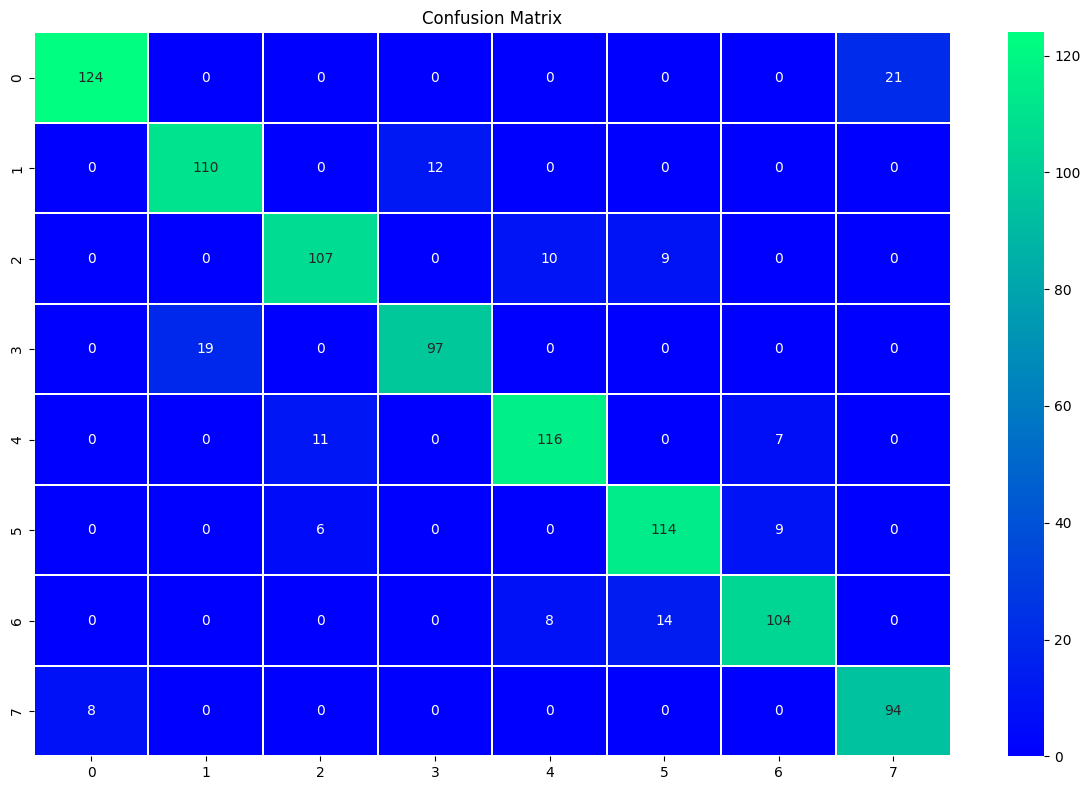

In [9]:
# Hitung confusion matrix
confuse = confusion_matrix(y_test, y_pred)

# Buat heatmap dengan angka integer
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(confuse, annot=True, fmt='d', linecolor="white", linewidths=.2, cmap="winter", ax=ax)
ax.set_title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [10]:
a = model.predict_proba(X_test.iloc[-1:, :])
for i, j in enumerate(a.ravel()):
    print(i+1, j*100)

1 0.0
2 2.9691883481210426
3 0.0
4 97.03081165187899
5 0.0
6 0.0
7 0.0
8 0.0


In [11]:
# Definisikan Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Tentukan parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced'],
    'min_samples_leaf': np.arange(1, 11)
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(random_forest_classifier, param_grid, cv=5)

# Jalankan grid search pada dataset
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [12]:
# Tampilkan hasil grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.8987999999999999


In [13]:
model = grid_search.best_estimator_
model

RandomForestClassifier(class_weight='balanced', min_samples_leaf=4,
                       random_state=42)

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")

print(f"""
      Accuracy : {accuracy:.3f}
      Precision Score : {precision:.3f}
      Recall Score : {recall:.3f}
      F1 Score : {f1:.3f}
      """)


      Accuracy : 0.886
      Precision Score : 0.886
      Recall Score : 0.886
      F1 Score : 0.886
      


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       145
           1       0.89      0.90      0.90       122
           2       0.87      0.86      0.86       126
           3       0.90      0.89      0.89       116
           4       0.89      0.87      0.88       134
           5       0.85      0.91      0.88       129
           6       0.89      0.87      0.88       126
           7       0.83      0.94      0.88       102

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



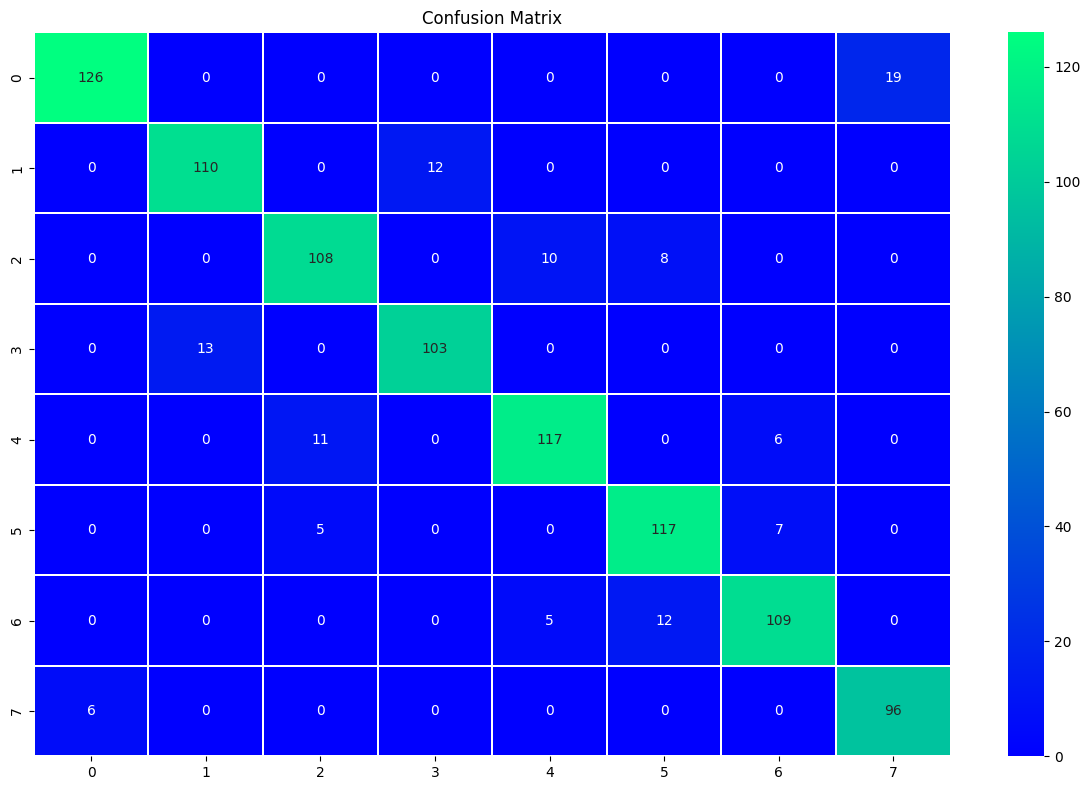

In [16]:
# Hitung confusion matrix
confuse = confusion_matrix(y_test, y_pred)

# Buat heatmap dengan angka integer
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(confuse, annot=True, fmt='d', linecolor="white", linewidths=.2, cmap="winter", ax=ax)
ax.set_title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [17]:
a = model.predict_proba(X_test.iloc[-1:, :])
for i, j in enumerate(a.ravel()):
    print(i+1, f"{j*100}")

1 0.0
2 2.5368517456884625
3 0.0
4 97.46314825431153
5 0.0
6 0.0
7 0.0
8 0.0


In [18]:
import joblib

joblib.dump(model, "./model_save/model8.pkl")

['./model_save/model8.pkl']